# 02_training_strength_model.ipynb

├── Section 1: Overview & Setup

├── Section 2: Load Clean Dataset

├── Section 3: Feature Selection & Split

├── Section 4: Model Training

├── Section 5: Evaluation

├── Section 6: Save Trained Model

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

df = pd.read_csv('../data/cleaned_concrete_data.csv')

print(df.shape)
df.head()
df.describe()
df['scm_frac'].isnull().any()

(1564, 21)


False

In [31]:
features = [
    'cement', 'slag', 'flyash', 'scm', 'water', 'superplasticizer',
    'coarse_agg', 'fine_agg', 'binder', 'w_b_ratio', 'scm_frac',
    'recycled_agg_pct', 'fiber_flag', 'age'
]

target = 'compressive_strength'

X = df[features]
y = df[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=12,
    min_samples_split=4
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_split=4, n_estimators=200,
                      random_state=42)

In [36]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f} MPa")


R²: 0.935
MAE: 3.18 MPa


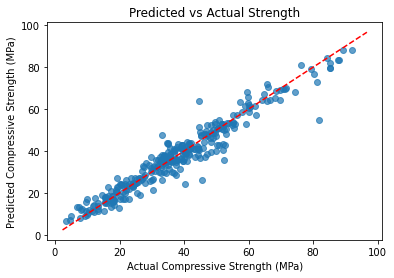

In [40]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title("Predicted vs Actual Strength")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [41]:
joblib.dump(model, '../models/strength_model.pkl')
print("✅ Model saved to ../models/strength_model.pkl")

✅ Model saved to ../models/strength_model.pkl
